In [54]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [55]:
import matplotlib.pyplot as plt
import seaborn as sns


In [56]:
data=pd.read_csv("/kaggle/input/digit-recognizer/train.csv")
test=pd.read_csv("/kaggle/input/digit-recognizer/test.csv")

In [57]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [58]:
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Preprocessing
Splitting the data for testing accuracy before training on full train data

In [59]:
from sklearn.model_selection import train_test_split

In [60]:
X_train, X_test, y_train, y_test = train_test_split(data.drop('label',axis=1), data['label'], test_size=0.3, random_state=42)

In [61]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [62]:
x_scaled_train=scaler.fit_transform(X_train)
x_scaled_test=scaler.transform(X_test)

## Building the model

In [63]:
from sklearn.neighbors import KNeighborsClassifier

Taking 10 neighbours randomly

In [64]:
knn=KNeighborsClassifier(n_neighbors=10)

In [65]:
knn.fit(x_scaled_train,y_train)

KNeighborsClassifier(n_neighbors=10)

In [66]:
from sklearn.metrics import accuracy_score

In [67]:
pred=knn.predict(x_scaled_test)

In [68]:
print(accuracy_score(y_test,pred))

0.9317460317460318


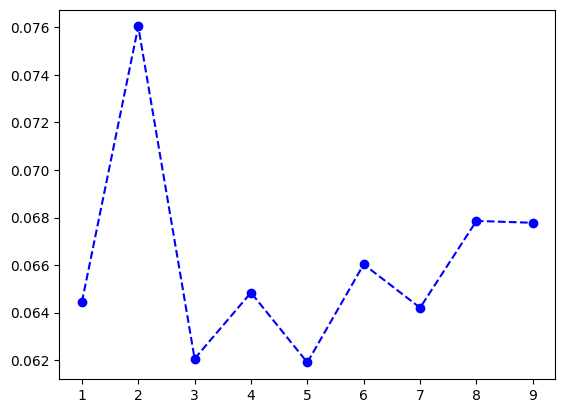

In [70]:
error_rate=[]

for i in range(1,10):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_scaled_train,y_train)
    pred_i=knn.predict(x_scaled_test)
    error_rate.append(np.mean(y_test!=pred_i))
    
plt.plot(range(1,10),error_rate,linestyle='dashed',color='blue',marker='o')

From the graph, we choose n=3 or 5 to reduce error rate

In [71]:
knn=KNeighborsClassifier(n_neighbors=3)

In [72]:
knn.fit(x_scaled_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [73]:
pred=knn.predict(x_scaled_test)

In [74]:
print(accuracy_score(y_test,pred))

0.937936507936508


Now training on full data

In [75]:
x_data=data.drop('label',axis=1)
x_scaled_data=scaler.fit_transform(x_data)

In [76]:
y_data=data['label']


In [77]:
scaled_test=scaler.transform(test)

In [78]:
knn.fit(x_scaled_data,y_data)

KNeighborsClassifier(n_neighbors=3)

In [79]:
final_pred=knn.predict(scaled_test)

In [85]:
submission=pd.DataFrame({'ImageId':test.index+1,'Label':final_pred})

In [86]:
print(submission)

       ImageId  Label
0            1      2
1            2      0
2            3      9
3            4      4
4            5      3
...        ...    ...
27995    27996      9
27996    27997      7
27997    27998      3
27998    27999      9
27999    28000      2

[28000 rows x 2 columns]


In [82]:
submission.to_csv('submission.csv',index=False)